In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.optimize as opt
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from asteroid import Asteroid

## Example usage

In [2]:
# load data
df = pd.read_fwf('../gtoc4_problem_data.txt', sep='\t', skiprows=1)
df.columns =  ['Name','Epoch','a','e','i','LAN','omega','M0']
df.head()

,Name,Epoch,a,e,i,LAN,omega,M0
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [3]:
# load all asteroids into a list 
asteroids = [None,]*len(df)

# create asteroids
for i in range(len(df)):
    asteroids[i] = Asteroid(*tuple(df.loc[i].values))

In [4]:
asteroids

[Asteroid '1580',
 Asteroid '1620',
 Asteroid '1943',
 Asteroid '2061',
 Asteroid '2135',
 Asteroid '2201',
 Asteroid '2329',
 Asteroid '2340',
 Asteroid '2368',
 Asteroid '3199',
 Asteroid '3352',
 Asteroid '3361',
 Asteroid '3551',
 Asteroid '3671',
 Asteroid '3752',
 Asteroid '3838',
 Asteroid '4015',
 Asteroid '4179',
 Asteroid '4183',
 Asteroid '4197',
 Asteroid '4401',
 Asteroid '4581',
 Asteroid '4769',
 Asteroid '4953',
 Asteroid '4954',
 Asteroid '5324',
 Asteroid '5381',
 Asteroid '5496',
 Asteroid '5836',
 Asteroid '5879',
 Asteroid '6047',
 Asteroid '6050',
 Asteroid '6178',
 Asteroid '6491',
 Asteroid '6611',
 Asteroid '7088',
 Asteroid '7236',
 Asteroid '7335',
 Asteroid '7822',
 Asteroid '7888',
 Asteroid '7889',
 Asteroid '7977',
 Asteroid '8037',
 Asteroid '8566',
 Asteroid '10165',
 Asteroid '11284',
 Asteroid '15745',
 Asteroid '15817',
 Asteroid '18736',
 Asteroid '20425',
 Asteroid '20429',
 Asteroid '22753',
 Asteroid '24443',
 Asteroid '25330',
 Asteroid '26166',

In [5]:
#printing
print(asteroids[0])

Asteroid '1580'


In [6]:
print(asteroids[0].details())

*Asteroid '1580'*
  Epoch0 (MJD)  : 54800.0
  a (AU)        : 2.1968033753931695
  e (deg)       : 27.942183758436297
  i (deg)       : 52.09079390385544
  LAN (deg)     : 62.324795115974354
  argPeri (deg) : 159.53983855505257
  meanAnom (deg): 3.5216868177911254


In [7]:
# define epochs in MJD
epoch = 54801
# for simplicity
ast1 = asteroids[1]
ast2 = asteroids[2]

In [8]:
# you can get the position
ast1.get_r(epoch = 54810)

array([-1.53722817e+08,  1.00968769e+08,  7.99396160e+06])

In [9]:
# or the distance from the sun (in km)
ast2.get_r_mag(epoch = epoch)

262123622.1994527

In [10]:
# or other parameters
# all angles are in radians
print(f'mean anom: {ast1.get_meanAnom(epoch)}')
print(f'ecc  anom: {ast1.get_eccAnom(epoch)}')
print(f'true anom: {ast1.get_trueAnom(epoch)}')

mean anom: 2.4026037811985828
ecc  anom: 2.5809928832963394
true anom: 4.305419257110279


In [11]:
# you can also use a different method, if you provide the necessary details
ast1.get_trueAnom(epoch, method='secant', x0=5, x1=10)

4.305419257110279

In [12]:
# compute vector to get from one asteroid to another
# returns (ast_2.r - ast_1.r)
ast1.dist_to(ast2, epoch)

array([ 2.51939110e+08,  1.21453912e+08, -1.27067324e+07])

In [13]:
# compute distance (magnitude) between two asteroids
# returns norm(ast_2.r - ast_1.r)
ast1.dist_to_mag(ast2, epoch)

279974693.889173

In [14]:
# create a list of distanes from 0th asteroid to all other asteroids, and print the minimum
dists = [(asteroids[i].name, asteroids[0].dist_to_mag(asteroids[i],epoch)) for i in range(len(asteroids)) if i is not 0]
ast, dist = min(dists, key = lambda t: t[1])
print(f'Closest to {ast}, dist = {dist} km')

Closest to '2008JP2, dist = 13872928.75611199 km


In [15]:
# same for a range of times
times = np.linspace(54800, 55100, 11)
AU = 1.29597870691e+8

for epoch in times:
    dists = [(asteroids[i].name, asteroids[0].dist_to_mag(asteroids[i],epoch)) for i in range(len(asteroids)) if i is not 0]
    ast, dist = min(dists, key = lambda t: t[1])
    print(f'Epoch {epoch}: Closest to {ast}; dist = {dist/AU} AU')
    

Epoch 54800.0: Closest to '2008JP2; dist = 0.12044502283504759 AU
Epoch 54830.0: Closest to '2003VE1; dist = 0.47588526099748774 AU
Epoch 54860.0: Closest to '164121'; dist = 0.5889350438343697 AU
Epoch 54890.0: Closest to '55532'; dist = 0.7501397739218078 AU
Epoch 54920.0: Closest to '55532'; dist = 0.5338692780861641 AU
Epoch 54950.0: Closest to '2005NG5; dist = 0.865423982812671 AU
Epoch 54980.0: Closest to '2005NG5; dist = 0.5178823300526454 AU
Epoch 55010.0: Closest to '2006DQ6; dist = 0.20841443014368882 AU
Epoch 55040.0: Closest to '6178'; dist = 0.26290781753270154 AU
Epoch 55070.0: Closest to '162979'; dist = 0.4208963419288107 AU
Epoch 55100.0: Closest to '162979'; dist = 0.3816149906383344 AU


In [16]:
# image of distances between asteroids, at a given epoch
N = len(asteroids)

dists = np.zeros([N,N])
AU = 1.29597870691e+8
epoch = 54800

for i in range(N):
    for j in range(N):
        if j>i:
            d = asteroids[i].dist_to_mag(asteroids[j], epoch)/AU
            dists[i,j] = d
            dists[j,i] = d
            
# pretty efficient because the positions from the last epoch that we calculated are stored 
# within the object and can be quickly retrived. Means the positions are only calculated once for each asteroid
# the gridded distance calcs need to be done on the upper-triangular space, and takes a few seconds on python

Text(0.5, 1.0, 'Distance (AU) between asteroids at 54800MJD')

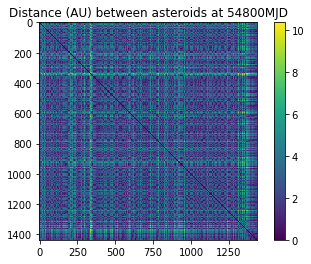

In [17]:
plt.imshow(dists)
plt.colorbar()
plt.title(f'Distance (AU) between asteroids at {epoch}MJD')

In [18]:
# therefore we can see that the minimum distance between two asteroids at epoch is about 0.005 AU
dists[dists>0].min()

0.004906130530691205

for 55174MJD: min_dist is 0.01735387833958295 AU
for 54815MJD: min_dist is 0.018743199182098137 AU
for 55732MJD: min_dist is 0.016774873173892237 AU
for 55310MJD: min_dist is 0.019225389195718933 AU


KeyboardInterrupt: 

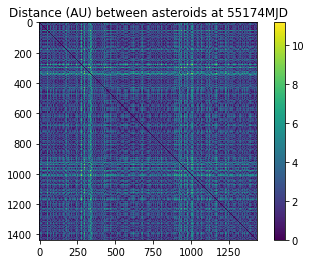

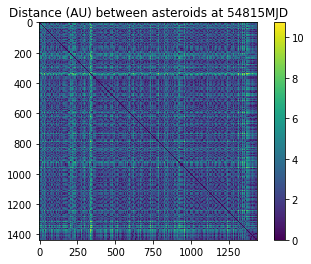

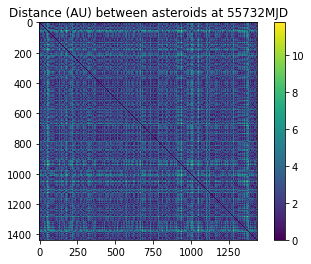

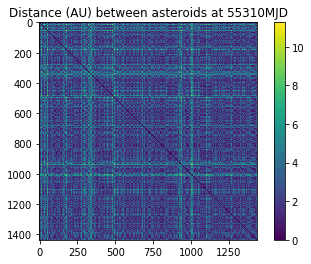

In [19]:
%%timeit

# image of distances between asteroids, at a given epoch
N = len(asteroids)

dists = np.zeros([N,N])
AU = 1.29597870691e+8
epoch = random.randint(54800, 55900)

for i in range(N):
    for j in range(N):
        if j>i:
            d = asteroids[i].dist_to_mag(asteroids[j], epoch)/AU
            dists[i,j] = d
            dists[j,i] = d
            
# pretty efficient because the positions from the last epoch that we calculated are stored 
# within the object and can be quickly retrived. Means the positions are only calculated once for each asteroid
# the gridded distance calcs need to be done on the upper-triangular space, and takes a few seconds on python
plt.figure()
plt.imshow(dists)
plt.colorbar()
plt.title(f'Distance (AU) between asteroids at {epoch}MJD')

# therefore we can see that the minimum distance between two asteroids at epoch is about 0.005 AU
print(f'for {epoch}MJD: min_dist is {dists[dists>0].min()} AU')


In [18]:
etrange = np.linspace(54801, 54901, 100)
r = []

# for # of asteroids
for el in etrange:
    r.append(ast1.get_r_mag(el))
    
